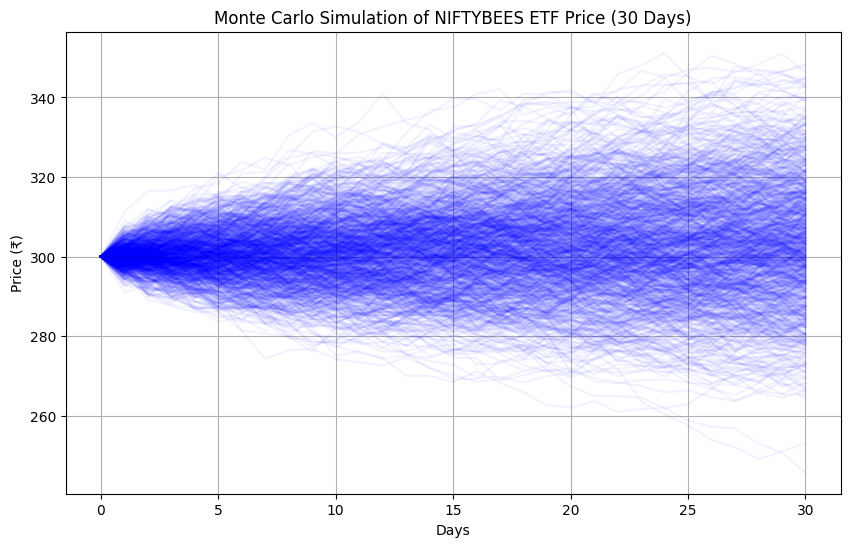

Mean final price: ₹303.57
Standard deviation of final prices: ₹15.88
5th percentile: ₹278.08
95th percentile: ₹330.09


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for NIFTYBEES ETF
S0 = 300.0  # Initial price
mu = 0.10  # Annual expected return
sigma = 0.15  # Annual volatility
T = 30 / 252  # Time horizon (30 days / 252 trading days per year)
dt = 1 / 252  # Time step (1 day)
N = 30  # Number of time steps
M = 1000  # Number of simulations

# Set random seed for reproducibility
np.random.seed(42)


# Monte Carlo Simulation using Geometric Brownian Motion
def monte_carlo_simulation(S0, mu, sigma, T, dt, N, M):
    # Initialize array to store price paths
    prices = np.zeros((M, N + 1))
    prices[:, 0] = S0

    # Generate price paths
    for t in range(1, N + 1):
        # Random shocks from normal distribution
        z = np.random.normal(0, 1, M)
        # GBM formula: S(t) = S(t-1) * exp((mu - 0.5*sigma^2)*dt + sigma*sqrt(dt)*z)
        prices[:, t] = prices[:, t - 1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
        )

    return prices


# Run simulation
price_paths = monte_carlo_simulation(S0, mu, sigma, T, dt, N, M)

# Plot results
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(
        price_paths[i, :], color="blue", alpha=0.05
    )  # Plot each path with low opacity
plt.title("Monte Carlo Simulation of NIFTYBEES ETF Price (30 Days)")
plt.xlabel("Days")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

# Calculate and print summary statistics
final_prices = price_paths[:, -1]
print(f"Mean final price: ₹{np.mean(final_prices):.2f}")
print(f"Standard deviation of final prices: ₹{np.std(final_prices):.2f}")
print(f"5th percentile: ₹{np.percentile(final_prices, 5):.2f}")
print(f"95th percentile: ₹{np.percentile(final_prices, 95):.2f}")